In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# import plotly.plotly as py
# import plotly.graph_objs as go 
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)

In [2]:
df1 = pd.read_csv("csv/funding_rounds.csv")
df1.head(10)

,company_name,country_code,state_code,region,city,investment_type,announced_on,raised_amount_usd,raised_amount,raised_amount_currency_code,...,post_money_valuation,post_money_currency_code,investor_count,cb_url,company_uuid,funding_round_uuid,created_at,updated_at,investor_names,investor_uuids
0,OnPath Technologies,USA,NJ,NJ - Other,Marlton,series_a,2007-03-17,8500000.0,NaN,NaN,...,NaN,NaN,NaN,https://www.crunchbase.com/funding-round/onpat...,dfaccc94-3874-9fa7-f1f9-680dbd7d5f2c,00006645-9ef6-8958-129a-2e225e577eb8,2010-12-14 07:02:56,2018-02-12 23:37:51,{},{}
1,Distributed ID,CAN,ON,Toronto,Toronto,seed,2017-02-01,103461.0,135000.0,CAD,...,2135000.0,CAD,NaN,https://www.crunchbase.com/funding-round/distr...,abb6101f-f808-fa9a-ec1c-1f7b4cc64513,00014924-0e2b-bd9e-65b9-da6cc58959dd,2017-07-08 03:31:12,2018-07-17 07:46:49,{},{}
2,Vapor Corp,USA,NY,NY - Other,Florida,debt_financing,2014-11-26,1250000.0,NaN,NaN,...,NaN,NaN,NaN,https://www.crunchbase.com/funding-round/vapor...,97d154d6-423e-b046-b335-f60d9b9f2279,0001c361-4849-c8fb-d6c6-157bba9e0847,2014-12-08 11:22:01,2018-02-12 23:19:17,{},{}
3,CloudVelox,USA,CA,SF Bay Area,Santa Clara,series_c,2015-02-12,15000000.0,NaN,NaN,...,NaN,NaN,3.0,https://www.crunchbase.com/funding-round/cloud...,3c8f1ae9-16f1-bd5f-2800-63756ed685de,0001cbd1-f7e2-4a56-607c-c57f46cc7dcb,2015-02-13 06:08:29,2018-02-12 23:42:38,"{""Third Point Ventures""}",{960ce830-967e-79c4-e98a-b402d7db9748}
4,HaloSource,USA,WA,Seattle,Bothell,post_ipo_equity,2017-07-19,2200000.0,NaN,NaN,...,NaN,NaN,2.0,https://www.crunchbase.com/funding-round/halos...,e2abf2a9-143f-08fc-471c-ef13762553ad,00025001-1cf4-8edb-abc3-05a0bb0a3a63,2017-07-20 05:09:17,2018-02-12 23:40:14,{},{}
5,Lucid Group Communications,GBR,NaN,GBR - Other,Loudwater,series_unknown,2017-06-12,13936399.0,11000000.0,GBP,...,NaN,NaN,1.0,https://www.crunchbase.com/funding-round/lucid...,d9d429ef-181e-b556-5847-b657cf477fe6,00027faf-5c46-d1a5-0aa6-7649b3218166,2017-06-12 11:11:04,2018-02-12 23:25:01,{LDC},{e7e5a267-ce84-b580-ccbf-40a17099d2aa}
6,Create! Art Collective,USA,CA,SF Bay Area,Daly City,equity_crowdfunding,2013-10-01,827000.0,NaN,NaN,...,NaN,NaN,NaN,https://www.crunchbase.com/funding-round/creat...,d23030ec-4ec3-0c2d-9482-113876316617,0002db7c-d749-28a1-7c56-578d92132174,2014-07-14 10:24:45,2018-02-12 22:17:16,{},{}
7,Bean Biltmore Pointe,USA,OR,"Portland, Oregon",Portland,series_unknown,2017-10-31,1320000.0,NaN,NaN,...,NaN,NaN,NaN,https://www.crunchbase.com/funding-round/bean-...,00d09cac-006a-497e-bc9d-ce5edf338292,0002fbee-5213-4933-a4ef-261b1a39780a,2018-09-05 11:05:07,2018-09-05 11:05:07,{},{}
8,SquareOne,USA,CA,Los Angeles,Pasadena,series_d,2009-03-24,4040262.0,NaN,NaN,...,NaN,NaN,NaN,https://www.crunchbase.com/funding-round/squar...,bfcbd499-d199-796f-81ba-8a5a239596f9,0002fd5d-8196-b8d7-3612-d799253faf9c,2014-02-14 11:33:24,2018-02-12 23:46:36,{},{}
9,Digital Influencers,BRA,NaN,BRA - Other,Fortaleza,angel,2016-04-01,13480.0,48000.0,BRL,...,423000.0,BRL,1.0,https://www.crunchbase.com/funding-round/digit...,5a6c66fb-f0ff-4942-aaa8-737c0ba04301,000334a9-b772-676c-0e0d-e15b0a967d56,2017-07-04 19:29:09,2018-02-12 23:51:06,{},{}


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232430 entries, 0 to 232429
Data columns (total 21 columns):
company_name                   232429 non-null object
country_code                   228677 non-null object
state_code                     137218 non-null object
region                         225020 non-null object
city                           225035 non-null object
investment_type                232430 non-null object
announced_on                   232430 non-null object
raised_amount_usd              173509 non-null float64
raised_amount                  34536 non-null float64
raised_amount_currency_code    34536 non-null object
post_money_valuation_usd       10758 non-null float64
post_money_valuation           3307 non-null float64
post_money_currency_code       3627 non-null object
investor_count                 162857 non-null float64
cb_url                         232430 non-null object
company_uuid                   232430 non-null object
funding_round_uuid         

In [4]:
df1.isnull().sum()

company_name                        1
country_code                     3753
state_code                      95212
region                           7410
city                             7395
investment_type                     0
announced_on                        0
raised_amount_usd               58921
raised_amount                  197894
raised_amount_currency_code    197894
post_money_valuation_usd       221672
post_money_valuation           229123
post_money_currency_code       228803
investor_count                  69573
cb_url                              0
company_uuid                        0
funding_round_uuid                  0
created_at                          0
updated_at                          0
investor_names                      0
investor_uuids                      0
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text xticklabel objects>)

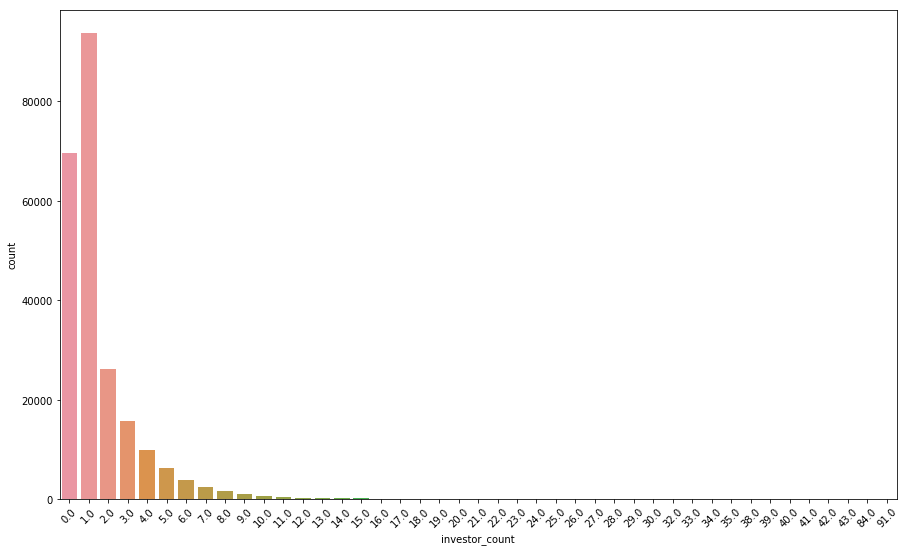

In [5]:

new_df1 = df1[['company_name', 'country_code','state_code','region',
              'city','investment_type','raised_amount_usd', 'investor_count']]
new_df1 = new_df1.fillna(value=0)
# print (new_df1.isnull().sum())
# print (new_df1)

#new_df1['investment_type'] = np.where(new_df1['investment_type'] == 'series_a', 1, 0)

investment_type = new_df1.investment_type.unique()
company_name = new_df1.company_name.unique()
country_code = new_df1.country_code.unique()
state_code = new_df1.state_code.unique()
region = new_df1.region.unique()
city = new_df1.city.unique()

#investment_type = {k: v for v, k in enumerate(investment_type)}
company_name = {k: v for v, k in enumerate(company_name)}
country_code = {k: v for v, k in enumerate(country_code)}
state_code = {k: v for v, k in enumerate(state_code)}
region = {k: v for v, k in enumerate(region)}
city = {k: v for v, k in enumerate(city)}

#new_df1.investment_type = new_df1.investment_type.map( investment_type )
new_df1.company_name = new_df1.company_name.map( company_name )
new_df1.country_code = new_df1.country_code.map( country_code )
new_df1.state_code = new_df1.state_code.map( state_code )
new_df1.region = new_df1.region.map( region )
new_df1.city = new_df1.city.map( city )

#The biggest Investor
plt.figure(figsize=(15,9))
sns.countplot(x='investor_count',data=new_df1)
plt.xticks(rotation=45)

# plt.figure(figsize=(15,9))
# sns.countplot(x='company_name',data=new_df1)
# plt.xticks(rotation=45)




(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),
 <a list of 66 Text xticklabel objects>)

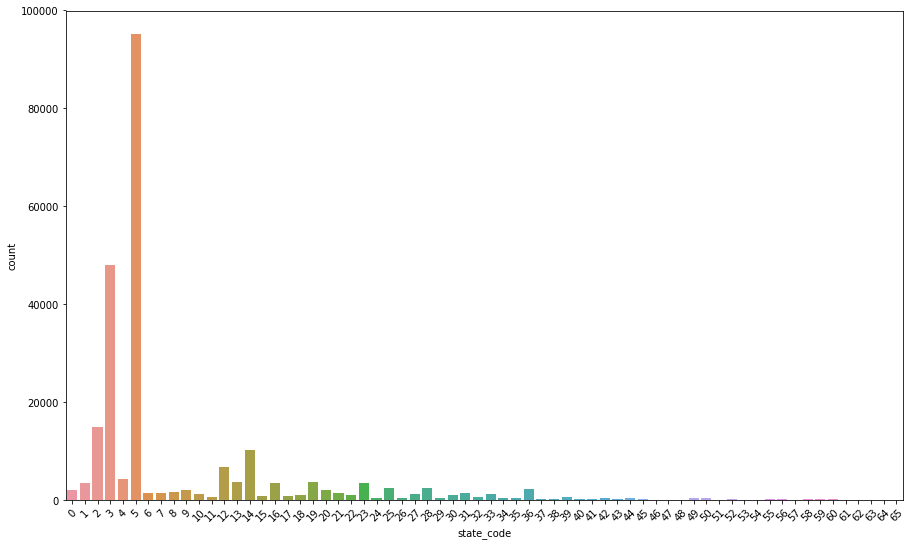

In [6]:
plt.figure(figsize=(15,9))
sns.countplot(x='state_code',data=new_df1)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

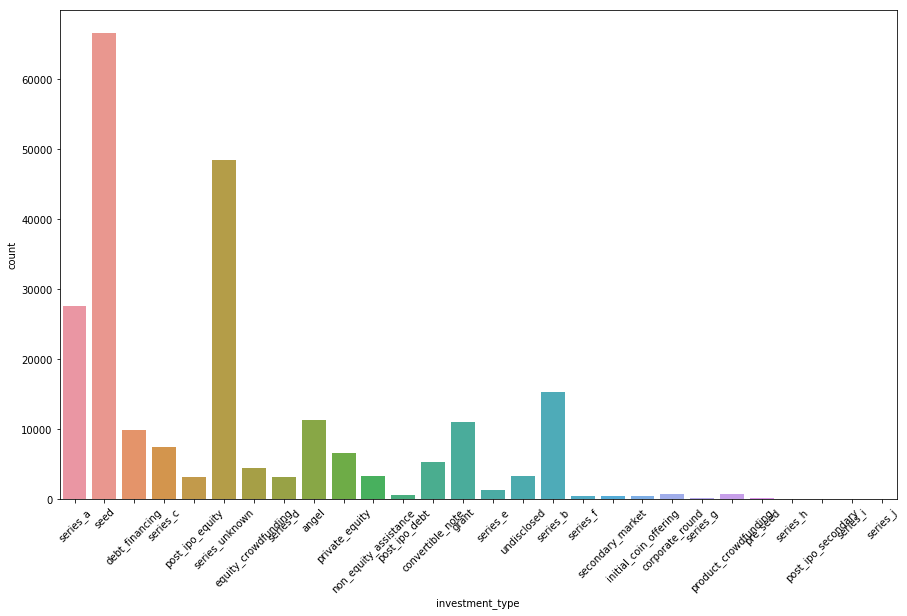

In [7]:
plt.figure(figsize=(15,9))
sns.countplot(x='investment_type',data=new_df1)
plt.xticks(rotation=45)

In [ ]:
new_df1['investment_type'] = np.where(new_df1['investment_type'] == 'series_a', 1, 0)

In [21]:
# print (new_df1['investment_type'].value_counts())
# print (investment_type)
data = new_df1
print (data['investment_type'].value_counts())

pos = data.loc[new_df1['investment_type'].isin([1])]
neg = data.loc[new_df1['investment_type'].isin([0])]
neg = neg.sample(frac=1)[0:int(len(pos)*1.5)]
print (len(pos))
print (len(neg))

data = pd.concat([pos,neg])
data = data.sample(frac=1)
print (len(data))

# Logistic Regression
from sklearn.linear_model import LogisticRegression
X = data[['company_name', 'country_code','state_code','region',
              'city','raised_amount_usd', 'investor_count']]
y = data['investment_type']

index = int(len(X)*0.7)
x_train = X[0:index]
y_train = y[0:index]
x_test = X[index:]
y_test = y[index:]


logreg  = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_log = logreg.predict(x_test)

acc_log_train = round(logreg.score(x_train, y_train) * 100, 2)
print("Train accuracy: ",acc_log_train)

acc_log_test = round(logreg.score(x_test,y_test) * 100, 2)
print("Test accuracy: ",acc_log_test)

0    204802
1     27628
Name: investment_type, dtype: int64
27628
41442
69070
Train accuracy:  60.06
Test accuracy:  59.86


In [22]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest# Random 
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(x_train, y_train)
y_pred_rnf = random_forest.predict(x_test)
random_forest.score(x_train, y_train)

acc_random_forest_train = round(random_forest.score(x_train, y_train) * 100, 2)
print("Train accuracy: ",acc_random_forest_train)

acc_random_forest_test = round(random_forest.score(x_test,y_test) * 100, 2)
print("Test accuracy: ",acc_random_forest_test)

Train accuracy:  99.76
Test accuracy:  71.11


231635    0
47755     1
226467    1
144194    1
110097    0
187554    0
68817     0
203550    0
188071    0
12939     0
14751     1
35019     1
188239    0
80558     0
230705    1
161199    0
13728     0
135868    0
223770    1
142809    0
71541     1
203744    1
150286    0
153258    0
167669    0
170249    0
112202    0
118499    0
109009    0
142635    1
         ..
27947     0
160518    0
187148    0
163711    0
191850    0
26261     0
76265     1
15763     1
176897    0
207819    1
151872    1
207903    0
140729    0
186348    0
142802    0
77708     1
58070     0
33258     1
86118     0
75597     0
170666    0
80535     0
132828    1
73088     0
216306    0
140654    0
81677     0
139562    0
31326     0
77433     0
Name: investment_type, Length: 48349, dtype: int64